In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC , SVR
from sklearn.model_selection import train_test_split

In [ ]:
iris = load_iris()

In [ ]:
X = iris.data[:, [0, 2]]
y = iris.target

In [ ]:
from sklearn import preprocessing
import numpy as np

#X_scaled = preprocessing.StandardScaler().fit_transform(X)

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
clf = SVC(kernel = 'linear', C = 1e5)
clf.fit(X_Train, Y_Train)

SVC(C=100000.0, kernel='linear')

In [ ]:
w = clf.coef_
b = clf.intercept_
print('w = ', w)
print('b = ', b)

w =  [[ 0.00000000e+00 -1.53846273e+00]
 [ 5.07614266e-02 -7.10659973e-01]
 [ 1.97734763e+01 -6.67784195e+01]]
b =  [  3.61538666   1.94923862 202.51143518]


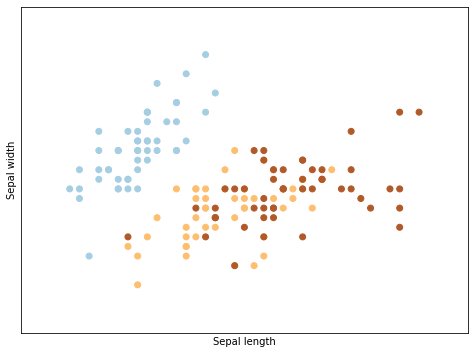

In [ ]:
def get2DPlot(iris):
    X = iris.data[:, :2]  # Lấy hai thuộc tính đầu tiên
    Y = iris.target
    X_min, X_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    Y_min, Y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    plt.figure(2, figsize=(8, 6))
    plt.clf()
 
    # Biểu diễn tập dữ liệu huấn luyện bằng đồ 
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
 
    plt.xlim(X_min, X_max)
    plt.ylim(Y_min, Y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

get2DPlot(iris)

In [ ]:
svc = SVC(kernel='linear', C=1.0).fit(X, y)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=1.0).fit(X, y)
poly_svc = SVC(kernel='poly', degree=3, C=1.0).fit(X, y)

In [ ]:
h = .01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

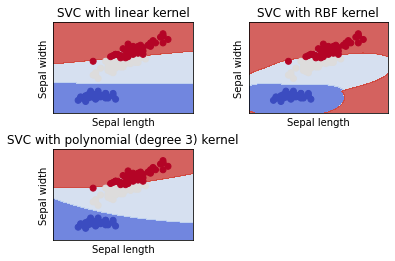

In [ ]:
# title for the plots
titles = ['SVC with linear kernel',
'SVC with RBF kernel',
'SVC with polynomial (degree 3) kernel']

color = ['red' , 'blue', 'green']
 
for i, clf in enumerate((svc, rbf_svc, poly_svc)):
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
  plt.subplot(2, 2, i + 1)
  plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
# Plot also the training points
  plt.scatter(X[:, 0], X[:, 1], c=y,  cmap=plt.cm.coolwarm)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(titles[i])
 
plt.show()